<a href="https://colab.research.google.com/github/malphons/Project_Columbia_HFBootcamp/blob/main/Class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hierarchical Clustering

- K-means clustering algorithms require you define the number of classes to be clustered, which is hard to determine ahead of time.
- Hierarchical clustering method is another popular clustering method
which seeks to build a hierarchy of clusters.
 - It does not require the user to specify the number of clusters. Instead, it requires to measure the dissimilarity between the pairs of clusters.

- There are two strategies for hierarchical clustering: **bottom-up** and **top-down**.
- We will be focusing on the most popular type of hierarchical clustering **bottom-up** or so called **agglomerative** clustering.

- Following is the general procedure of the algorithm.
1. Begin with $n$ observations and a distance measure of all pairwise dissimilarities. At this step, treat each of the $n$ observations as their own clusters.
2. For $i = n, (n - 1), ..., 2$:
 - a. Evaluate all pairwise inter-cluster dissimilarities among the $i$ clusters
and fuse together the pair of clusters that are the least dissimilar.
 - b. Note the dissimilarity between the recently fused cluster pair and mark that as the associated height in the dendrogram.
 - c. Repeat the process in step a, calculating the new pairwise inter-cluster dissimilarities among the remaining $(i - 1)$ clusters.
- Let's take a look at one simple example

<div>
<img src="https://drive.google.com/uc?export=view&id=1Krn_WUmpPAvdatl-3KN3RRYydjKUy7Gk" width="400" height="400" />

<img src="https://drive.google.com/uc?export=view&id=1zXGGyjEAtSQDesBaLT-n5oex5cmq_-Ud" width="400" height="400" />
</div>

### Dendrogram

<img src="https://drive.google.com/uc?export=view&id=1BtaqUnaRoroj4E4KsXi_B99OE8j-k7q3" width="600" height="400" />

- The dissimilarity between these two clusters indicates the height in the dendrogram at which the fusion should be placed.
- There are some interpretative advantages to visualizing the dendrogram created from hierarchical clustering:
 - The lower down in the dendrogram a cluster fusion occurs, the more similar the fused clusters are to each other.
 - The higher up in the dendrogram a fusion occurs, the more dissimilar the fused groups are to each other.
- In general, for any two observations we can inspect the dendrogram and find the location at which the groups that contain those two observations are fused together to get an idea of their dissimilarity.
- Be careful to consider the groups of points in the fusions within the dendrograms, not just individual points.

- While we do not need to specify $K$ a priori, in order to perform hierarchical clustering there are a few choices we need to make.
 - **A dissimilarity measure**
 - **A linkage method**

#### Dissimilarity Measure
- We are already familiar with the idea of choosing a dissimilarity measure with the choice of distance metric. In many cases, it is sufficient to use the **Euclidean distance**.
- But sometimes other dissimilarity measures might be preferred. For example, **correlation-based** distance considers two observations to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance.

- For instance, consider an online retailer interested in clustering shoppers
based on their past shopping histories. The goal is to identify subgroups
of similar shoppers, so that shoppers within each subgroup can be shown items and advertisements that are particularly likely to interest them.
- Suppose the data takes the form of a matrix where the rows are the shoppers and the columns are the items available for purchase; the elements of the
data matrix indicate the number of times a given shopper has purchased a
given item (i.e. a 0 if the shopper has never purchased this item, a 1 if the
shopper has purchased it once, etc.)
- What type of dissimilarity measure should be used to cluster the shoppers?

In [ ]:
(1,0,0,1,0,0,0,1)
(0,1,1,0,1,0,0,1)
(1,0,0,0,0,0,0,1)

#### Linkage Method
- A linkage is a measure of the dissimilarity between two group of points. So far we only define the distance between two points, but what do we do when we want to assess the similarity among two groups of points?
- First, compute all pairwise dissimilarities between the observations in
cluster A and the observations in cluster B. Then:

- **Complete Linkage**: Maximal inter-cluster dissimilarity.
 - Record the largest of the dissimilarities listed between members of A and of B as the overall inter-cluster dissimilarity.
- **Single Linkage**: Minimal inter-cluster dissimilarity.
 - Record the smallest of the dissimilarities listed between
members of A and of B as the overall inter-cluster dissimilarity.
- **Average Linkage**: Mean inter-cluster dissimilarity.
 - Record the average of the dissimilarities listed between the
members of A and of B as the overall inter-cluster dissimilarity.
- **Ward's Linkage**: Minimum variance method (for Euclidean distance).
 - Minimize the variance of the clusters being merged.

### Example: Iris Data
- Let's try to fit the hierarchical clustering model with the iris data.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
iris = datasets.load_iris()

hier = AgglomerativeClustering(n_clusters=3)
hier.fit(iris.data)

AgglomerativeClustering(n_clusters=3)

In [ ]:
hier.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

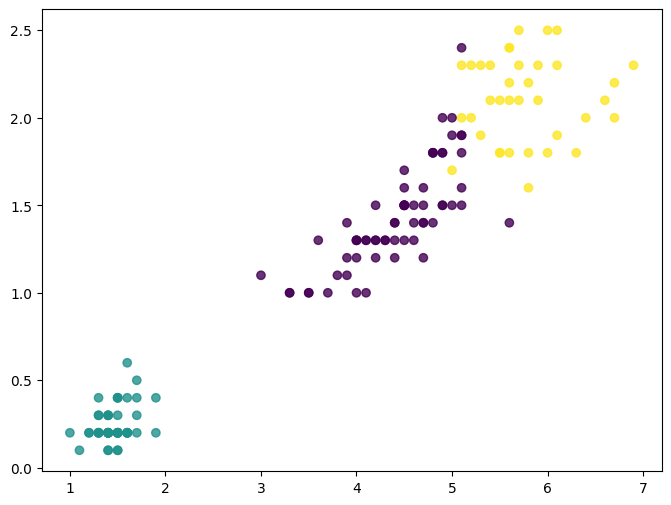

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=hier.labels_, alpha=0.8)
plt.show()

- The result is similar to the result of the K-means algorithm. The dendrogram corresponding to it can be sketched as below

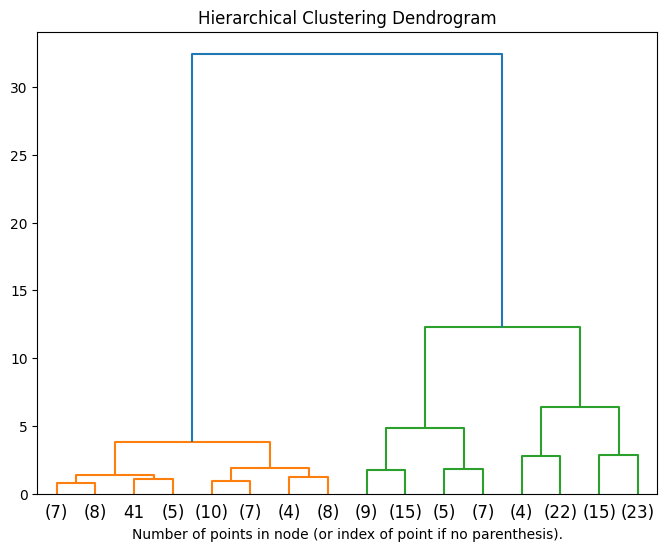

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

hier = AgglomerativeClustering(n_clusters=5, compute_distances=True)
hier.fit(iris.data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hier, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Principal Component Analysis (PCA)

- **Multicollinearity** is a phenomenon in which two or more predictors in a multiple linear regression model are highly correlated, meaning that one can be predicted from the others through linear formula with a substantial degree of accuracy.

- Issues:
 - The estimate of one variable's impact on the dependent variable Y while controlling for the others tends to be less reliable.
 - The standard errors of the affected coefficients tend to be large.

- Ideal input variables should be:
 - linearly uncorrelated,
 - low-dimensional in the feature space.

- **Principal component analysis (PCA)** is a tool that finds a sequence of linear combinations of the variables to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

<img src="https://drive.google.com/uc?export=view&id=12Q9lu-XLFrL6Ne8A4KLVm21fRf7v5rUY" width="600" height="600" />

In [ ]:
import pandas as pd
pd.options.display.max_columns = None

df = pd.read_csv("https://drive.google.com/uc?id=1DMfj_oQNPoqJNvDUha6bLhJI-w8JQv9e")
images = df.drop("label", axis=1)
label = df.label

In [ ]:
images.sample(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [ ]:
images.shape

(42000, 784)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

- Let's take a look at the images.

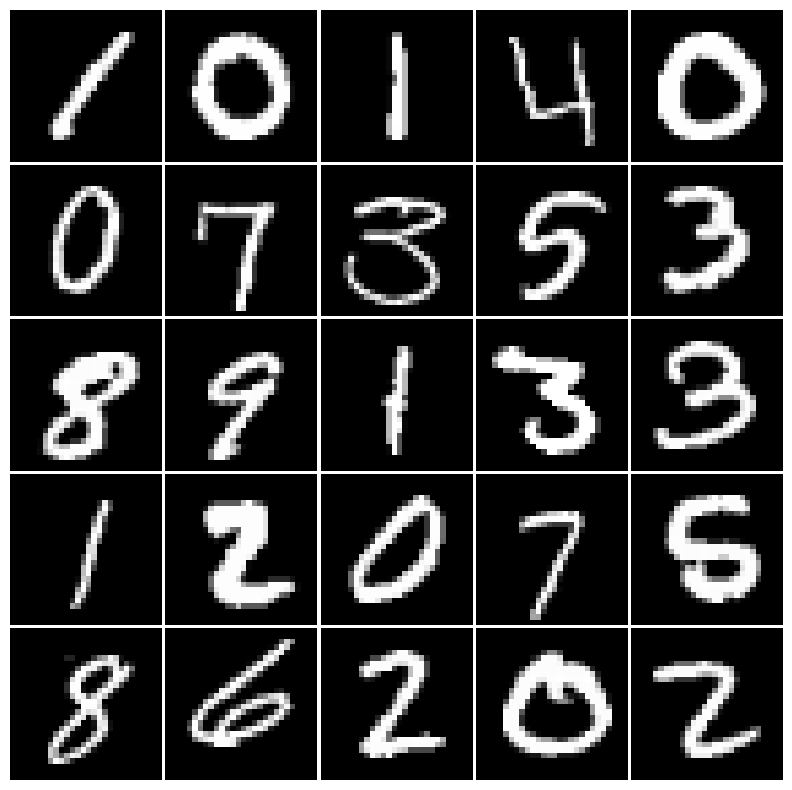

In [ ]:
n_sample = 25

fig = plt.figure(figsize=(10, 10))
num = int(n_sample**0.5)
gs = gridspec.GridSpec(num, num)
fig.subplots_adjust(wspace=0.01, hspace=0.02)
l = images.shape[1]
ll = int(l**0.5)
for i in range(num):
    for j in range(num):
        temp = np.array(images.loc[(num*i + j), :]).reshape(ll, ll)
        ax = plt.subplot(gs[i, j])
        ax.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
        ax.axis('off')
plt.show()

- Let's define a function that uses the principal components to reconstruct the images.

In [ ]:
from sklearn.decomposition import PCA

def visualize(images, n_components, n_sample=25):

    pca = PCA(n_components = n_components)
    transformed_images = pca.fit_transform(images)
    # convert back to original data
    transformed_images = pca.inverse_transform(transformed_images)

    fig = plt.figure(figsize=(10, 10))
    num = int(n_sample**0.5)
    gs = gridspec.GridSpec(num, num)
    fig.subplots_adjust(wspace=0.01, hspace=0.02)
    l = transformed_images.shape[1]
    ll = int(l**0.5)
    for i in range(num):
        for j in range(num):
            temp = transformed_images[(num*i + j), :].reshape(ll, ll)
            ax = plt.subplot(gs[i, j])
            ax.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
            ax.axis('off')
    plt.show()

In [ ]:
df.shape

(42000, 785)

- The result after keeping top 100 components

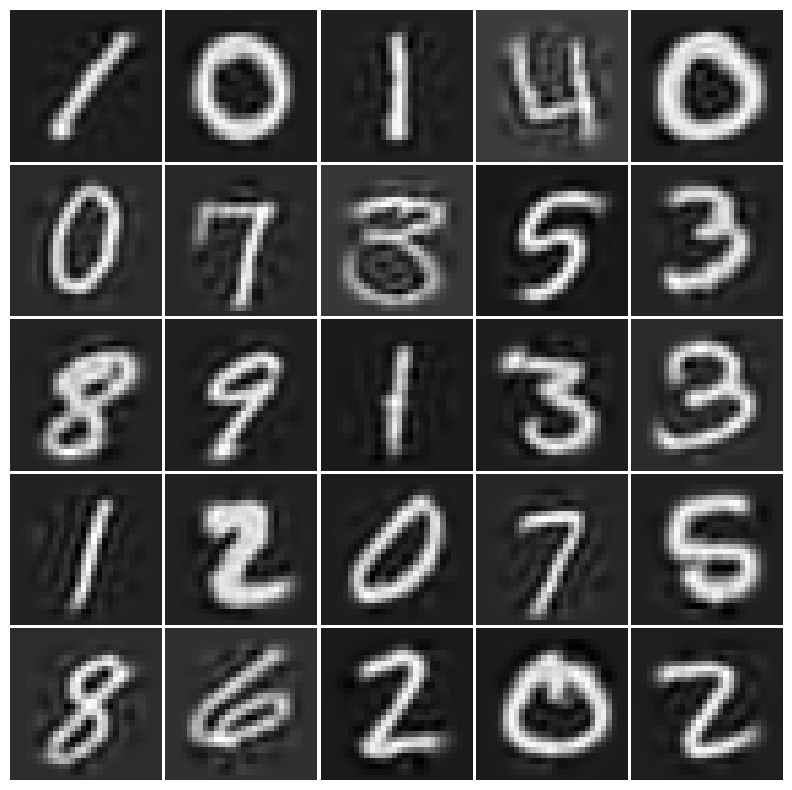

In [ ]:
visualize(images, 100)

- The result after keeping top 50 components

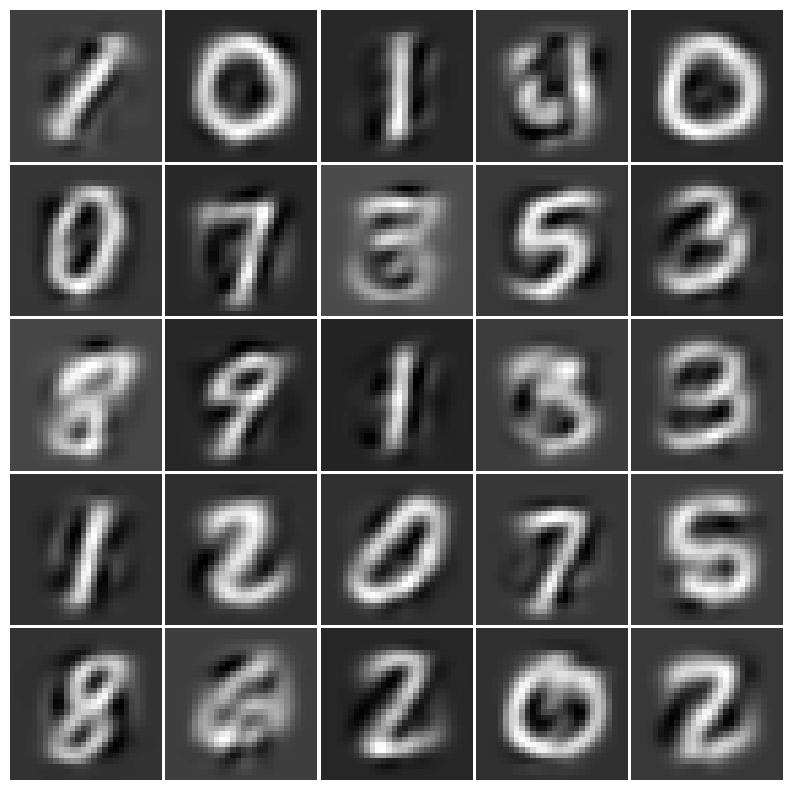

In [ ]:
visualize(images, 25)

In [ ]:
pca = PCA(n_components = 50)
transformed_images = pca.fit_transform(images)

pca.explained_variance_

array([334780.59149447, 245885.06513832, 211051.62698822, 184726.37342816,
       168070.0015068 , 147773.28274113, 112534.61945611,  99315.43743442,
        95016.01443299,  80660.73018992,  72091.28112172,  70706.5372777 ,
        58466.0488886 ,  58130.66595881,  54296.21671756,  50934.7635958 ,
        45318.36268187,  44049.12048052,  40795.35308887,  39585.84244148,
        36819.27443543,  34862.15972293,  33134.94858928,  31347.32791474,
        30481.77568809,  28803.41321758,  27879.30252896,  26696.27853362,
        25433.56724803,  23580.10141223,  22595.24890274,  21936.48003485,
        20582.39066703,  20223.41162321,  19379.38992382,  18576.92336602,
        17486.78970718,  16741.02306641,  16331.15498464,  16021.24495723,
        15554.48384975,  15281.02243785,  14362.97506646,  13650.4320899 ,
        13205.25375298,  12874.81455245,  12397.27065258,  11968.32524372,
        11555.06259677,  11014.21569063])

In [ ]:
pca.explained_variance_ratio_

array([0.09748938, 0.07160266, 0.06145903, 0.05379302, 0.04894262,
       0.04303214, 0.03277051, 0.02892103, 0.02766902, 0.02348871,
       0.02099325, 0.02059001, 0.01702553, 0.01692787, 0.01581126,
       0.0148324 , 0.01319688, 0.01282727, 0.01187976, 0.01152755,
       0.01072191, 0.01015199, 0.00964902, 0.00912846, 0.00887641,
       0.00838766, 0.00811856, 0.00777406, 0.00740635, 0.00686661,
       0.00657982, 0.00638799, 0.00599367, 0.00588913, 0.00564335,
       0.00540967, 0.00509222, 0.00487505, 0.00475569, 0.00466545,
       0.00452952, 0.00444989, 0.00418255, 0.00397505, 0.00384542,
       0.00374919, 0.00361012, 0.0034852 , 0.00336487, 0.00320737,
       0.00315465, 0.00309142, 0.00293708, 0.00286537, 0.00280756,
       0.00269614, 0.00265819, 0.0025629 , 0.0025381 , 0.00246148,
       0.00239703, 0.0023872 , 0.00227567, 0.00221513, 0.00213917,
       0.00206111, 0.00202795, 0.00195886, 0.00193512, 0.00188436,
       0.00186699, 0.00181464, 0.00176865, 0.00172498, 0.00165

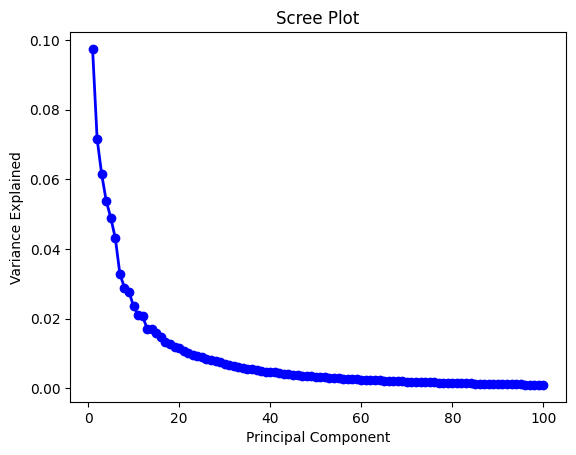

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca.components_.shape

(100, 784)